## CREDIT_CARD FRAUD_DETECTION USING UNSUPERVISED DEEP LEARNING

### Identify the Frauds with the Self-Organizing Map

##### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

/home/kushagra/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


###### Importing the Dataset

In [2]:
dataset=pd.read_csv('Credit_Card_Applications.csv')
dataset.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

###### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [6]:
print(X.shape)
print(y.shape)

(690, 15)
(690,)


##### Importing Minisom class from minisom

In [7]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

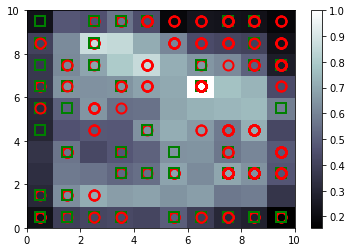

In [9]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

#### White cell here represents the winning node(i.e customers) with maximun inter-neuron distance.These are the possible cheats who are segregated from the group of customers with valid transcation 

##### Finding cheats

In [10]:
mapping=som.win_map(X)

frauds=np.concatenate((mapping[(6,6)],mapping[(4,7)]),axis=0)
frauds=sc.inverse_transform(frauds)

In [13]:
customer=dataset.iloc[:,1:].values
is_fraud=np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i]=1
    

##### Model_Architecture

In [17]:
classifier = Sequential()


classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))


classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


classifier.fit(customer, is_fraud, batch_size = 1, epochs = 5)


Epoch 1/5
690/690 [==============================] - 12s 17ms/step - loss: 0.3368 - acc: 0.9261
Epoch 2/5
690/690 [==============================] - 1s 2ms/step - loss: 0.2551 - acc: 0.9290
Epoch 3/5
690/690 [==============================] - 1s 2ms/step - loss: 0.2266 - acc: 0.9290
Epoch 4/5
690/690 [==============================] - 1s 2ms/step - loss: 0.2172 - acc: 0.9290
Epoch 5/5
690/690 [==============================] - 1s 2ms/step - loss: 0.2150 - acc: 0.9290


###### Prediction in terms of probabilities

In [18]:
y_pred = classifier.predict(customer)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [20]:
y_pred

array([[1.57901130e+07, 0.00000000e+00],
       [1.55988020e+07, 4.65980689e-24],
       [1.57627160e+07, 2.52254872e-23],
       ...,
       [1.56364540e+07, 3.03051382e-01],
       [1.57523440e+07, 3.26709926e-01],
       [1.56114090e+07, 3.33493024e-01]])